2º Projeto Prático - Turma de Dados
Por Thais Gulias

Análise de Dados e Predição com Python e Pandas
Desafio
Realize uma análise completa usando Python e a biblioteca Pandas numa base de dados de preços de aluguéis em São Paulo. Utilize a regressão linear para modelar uma relação entre variáveis do conjunto de dados. Os estudantes aprenderão a importar dados, limpar, explorar, visualizar e tirar conclusões a partir dos dados, além de ajustar um modelo de regressão linear e avaliar seu desempenho.

Etapas
a. Obter base de dados: Faça download da base de dados;
b. Importação e Limpeza: Importe os dados para um DataFrame do Pandas, limpe os dados e trate valores ausentes;
c. Análise Descritiva: Realize uma análise descritiva dos dados, calculando estatísticas básicas e identificando tendências;

d. Modelagem de Regressão Linear: Ajuste um modelo de regressão linear aos dados para tentar prever o preço do aluguel em uma determinada área;
e. Visualização de Dados: Crie visualizações gráficas usando bibliotecas como Matplotlib ou Seaborn para representar os dados;
f. Conclusões: Tire conclusões a partir das análises realizadas e apresente os resultados em um relatório.

##Instalações

In [1]:
!pip install pandas

In [2]:
pip install matplotlib

In [3]:
pip install seaborn

In [4]:
pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.linear_model import LinearRegression

## b. Importação e Limpeza

In [6]:
df = pd.read_csv('/content/base-alugueis-sp.csv') #a. Obter base de dados

In [7]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [8]:
df.shape

(11657, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [10]:
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [11]:
df.isna().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['address', 'district', 'area', 'bedrooms', 'garage', 'type', 'rent',
       'total'],
      dtype='object')

In [14]:
df = df.rename(columns={
    'address': 'endereco',
    'district': 'bairro',
    'area': 'area',
    'bedrooms': 'quartos',
    'garage': 'vaga_garagem',
    'type': 'tipo',
    'rent': 'aluguel',
    'total': 'total'
})

In [15]:
df.head()

,endereco,bairro,area,quartos,vaga_garagem,tipo,aluguel,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


## c. Análise Descritiva:

In [16]:
df.describe()

,area,quartos,vaga_garagem,aluguel,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [29]:
grouped_quartos_vagas = df.groupby('bairro')[['quartos', 'vaga_garagem']].mean()
grouped_quartos_vagas

,quartos,vaga_garagem
bairro,,
Aclimação,1.800000,0.720000
Adalgisa,3.500000,3.500000
Agua Branca,2.000000,1.000000
Alphaville,3.375000,3.625000
Alphaville Centro Industrial E Empresarial/alphaville.,2.400000,2.400000
...,...,...
Várzea da Barra Funda,1.727273,0.818182
Água Branca,1.931818,0.909091
Água Fria,2.550000,1.650000


In [33]:
mais_quartos = grouped_quartos_vagas.head(5)
mais_quartos

,quartos,vaga_garagem
bairro,,
Aclimação,1.800,0.720
Adalgisa,3.500,3.500
Agua Branca,2.000,1.000
Alphaville,3.375,3.625
Alphaville Centro Industrial E Empresarial/alphaville.,2.400,2.400


In [34]:
menos_quartos = grouped_quartos_vagas.tail(5)
menos_quartos

,quartos,vaga_garagem
bairro,,
Várzea da Barra Funda,1.727273,0.818182
Água Branca,1.931818,0.909091
Água Fria,2.550000,1.650000
Água Funda,2.000000,1.000000
Água Rasa,2.210526,0.842105


por termos Agua Branca e Água Branca- mostra falta de padrão no preenchimento dos dados. Melhor ofertar lista ou preencher automatico pelo CEP.


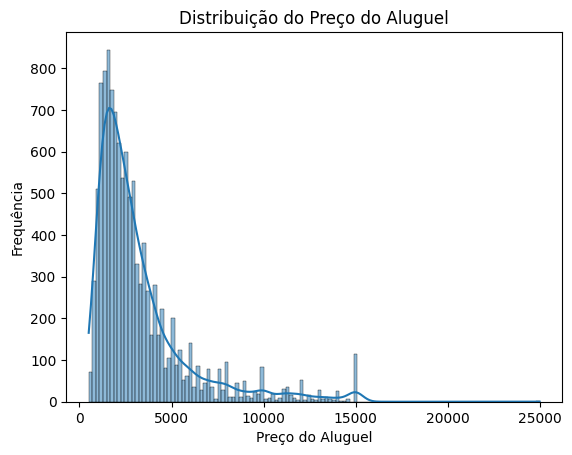

In [17]:
sns.histplot(df['aluguel'], kde=True)
plt.title('Distribuição do Preço do Aluguel')
plt.xlabel('Preço do Aluguel')
plt.ylabel('Frequência')
plt.show()


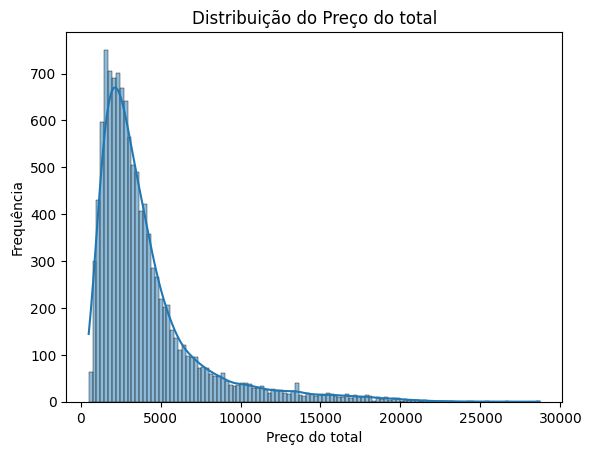

In [18]:
sns.histplot(df['total'], kde=True)
plt.title('Distribuição do Preço do total')
plt.xlabel('Preço do total')
plt.ylabel('Frequência')
plt.show()

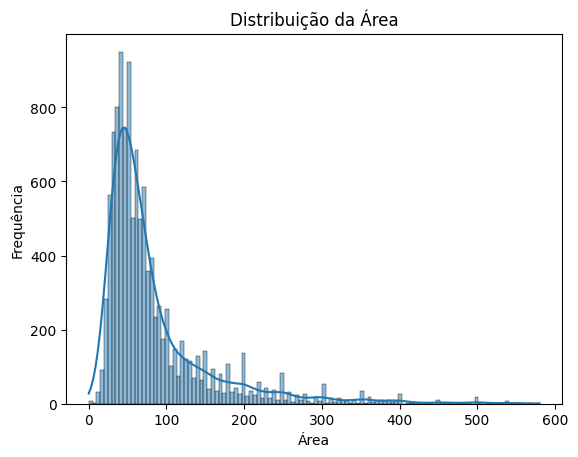

In [19]:
sns.histplot(df['area'], kde=True)
plt.title('Distribuição da Área')
plt.xlabel('Área')
plt.ylabel('Frequência')
plt.show()

In [41]:
tipo_por_bairro = pd.crosstab(df['bairro'], df['tipo'])
tipo_por_bairro

tipo,Apartamento,Casa,Casa em condomínio,Studio e kitnet
bairro,,,,
Aclimação,39,9,0,2
Adalgisa,2,2,0,0
Agua Branca,1,0,0,0
Alphaville,6,5,13,0
Alphaville Centro Industrial E Empresarial/alphaville.,4,0,0,1
...,...,...,...,...
Várzea da Barra Funda,11,0,0,0
Água Branca,36,3,0,5
Água Fria,8,9,3,0


In [46]:
media_tamanho_por_bairro = df.groupby('bairro')['total'].mean()
media_aluguel_por_bairro = df.groupby('bairro')['aluguel'].mean()

bairro_maior_tamanho = media_tamanho_por_bairro.idxmax()
bairro_maior_aluguel = media_aluguel_por_bairro.idxmax()

print(f"Bairro com imóveis de maior tamanho médio: {bairro_maior_tamanho}")
print(f"Bairro com imóveis de maior aluguel médio: {bairro_maior_aluguel}")


bairro_menor_tamanho = media_tamanho_por_bairro.idxmin()
bairro_menor_aluguel = media_aluguel_por_bairro.idxmin()

print(f"Bairro com imóveis de menor tamanho médio: {bairro_menor_tamanho}")
print(f"Bairro com imóveis de menor aluguel médio: {bairro_menor_aluguel}")


Bairro com imóveis de maior tamanho médio: Cidade Jardim
Bairro com imóveis de maior aluguel médio: Alphaville Residencial Dois
Bairro com imóveis de menor tamanho médio: Jardim Jaçanã
Bairro com imóveis de menor aluguel médio: Jardim Jaçanã


In [45]:
contagem_tipos_imoveis = df['tipo'].value_counts()
contagem_tipos_imoveis


tipo
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64

In [20]:
# Correlação de Pearson
corr_matrix = df[['area', 'quartos', 'vaga_garagem', 'aluguel']].corr()
print(corr_matrix)

                  area   quartos  vaga_garagem   aluguel
area          1.000000  0.727905      0.733403  0.667173
quartos       0.727905  1.000000      0.656906  0.531164
vaga_garagem  0.733403  0.656906      1.000000  0.617276
aluguel       0.667173  0.531164      0.617276  1.000000


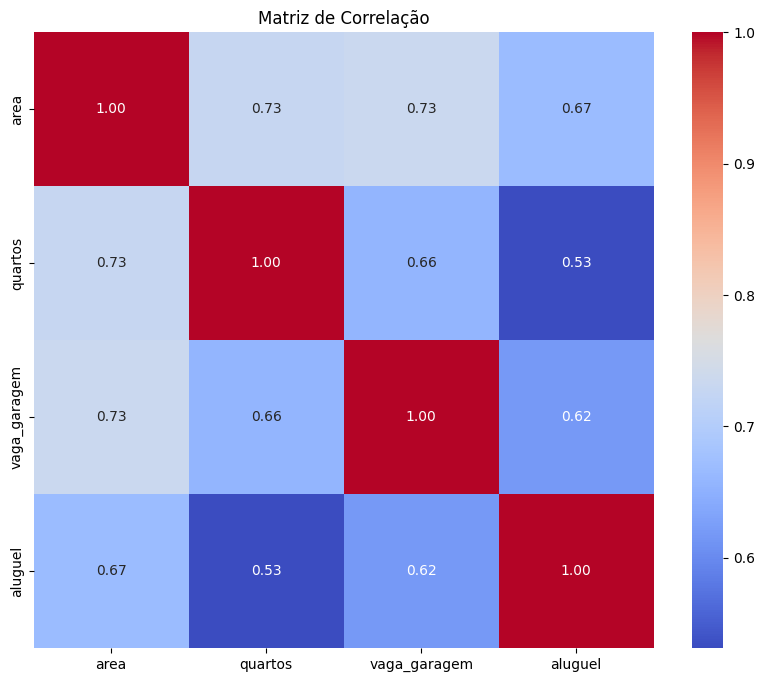

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

##d. Modelagem de Regressão Linear:

In [22]:
X = df[['area']]
y = df['aluguel']
modelo = LinearRegression()
modelo.fit(X, y)

intercept = modelo.intercept_
slope = modelo.coef_[0]

print(f'Intercepto (Beta 1): {intercept}')
print(f'Coeficiente Angular (Beta 2): {slope}')

Intercepto (Beta 1): 1228.238262445935
Coeficiente Angular (Beta 2): 23.891805764784177


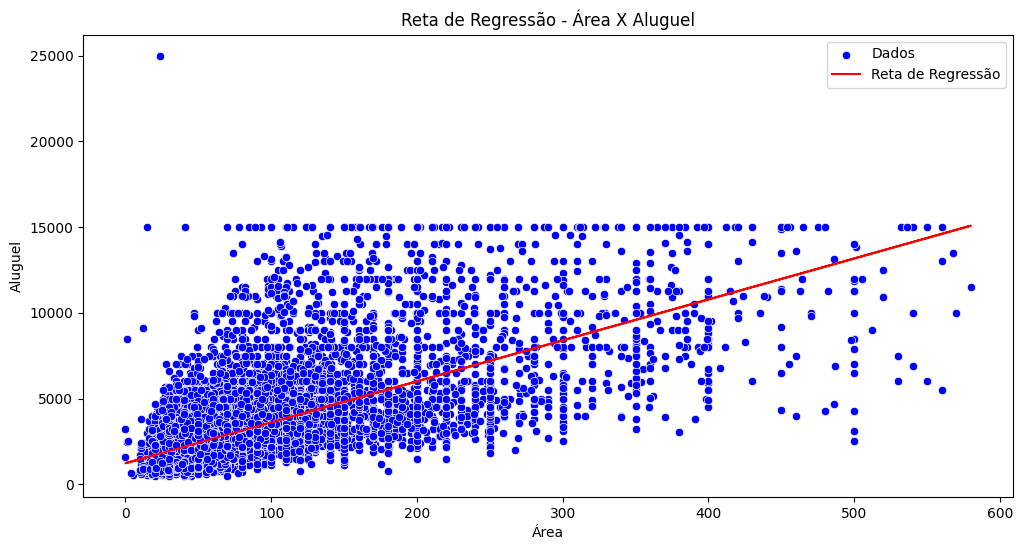

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='aluguel', data=df, color='blue', label='Dados')

line = slope * df['area'] + intercept
plt.plot(df['area'], line, color='red', label='Reta de Regressão')

plt.title('Reta de Regressão - Área X Aluguel')
plt.xlabel('Área')
plt.ylabel('Aluguel')
plt.legend()
plt.show()

##e. Visualização de Dados:
além das visualizações acima


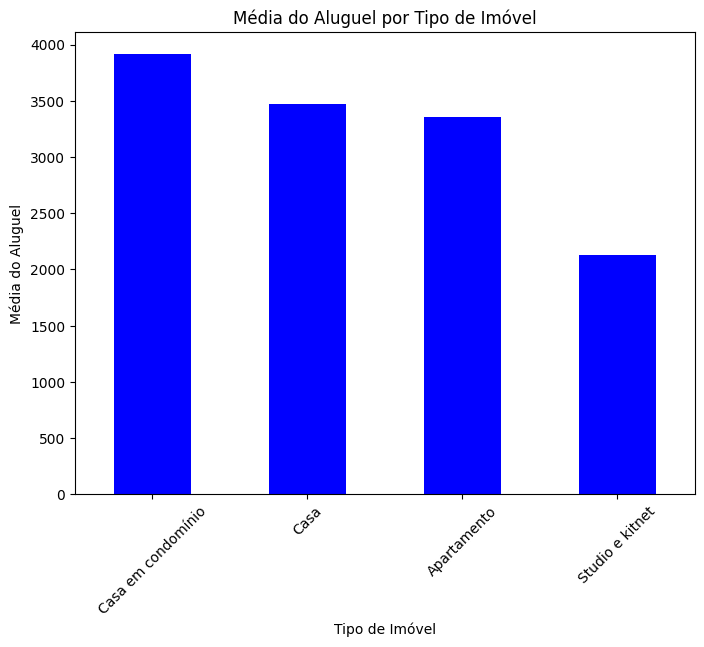

In [24]:
media_aluguel_tipo = df.groupby('tipo')['aluguel'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
media_aluguel_tipo.plot(kind='bar', color='blue')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Média do Aluguel')
plt.title('Média do Aluguel por Tipo de Imóvel')
plt.xticks(rotation=45)
plt.show()

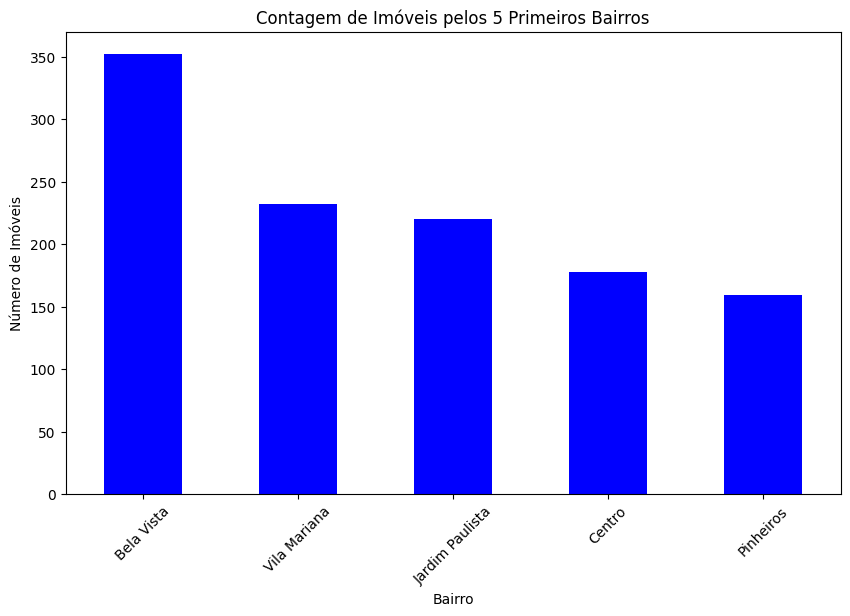

In [25]:
contagem_bairro = df.groupby('bairro').size().sort_values(ascending=False)
top_bairros = contagem_bairro.head(5)
plt.figure(figsize=(10, 6))
top_bairros.plot(kind='bar', color='blue')
plt.xlabel('Bairro')
plt.ylabel('Número de Imóveis')
plt.title('Contagem de Imóveis pelos 5 Primeiros Bairros')
plt.xticks(rotation=45)
plt.show()

##f. Conclusões:

Correlação entre Variáveis:

Todas as variáveis apresentam correlações positivas entre si, sugerindo que, de modo geral, quando uma variável aumenta, as outras também tendem a aumentar.
A área possui uma forte correlação positiva com todas as outras variáveis, indicando que propriedades com maior área tendem a ter mais quartos, mais vagas na garagem e aluguéis mais altos.
Distribuição de Imóveis por Bairro:

Bela Vista possui o maior número de imóveis anunciados, seguido por Vila Mariana e Jardim Paulista.
Apesar de ser o tipo de imóvel menos anunciado, os aluguéis mais caros são em Casas de Condomínio.
O tipo de imóvel mais anunciado são os apartamentos.
Estatísticas sobre Tamanhos e Aluguéis:

Algumas listagens anunciam uma área mínima de 0 metros, o que é incomum e pode indicar dados faltantes ou incorretos.
O maior imóvel anunciado possui 580 metros quadrados, localizado no Pacaembu.
O aluguel mais caro está no bairro do Planalto Paulista, atingindo R$ 28.700, enquanto o mais barato é de R$ 509 em Jardim Jaçanã.
Bairros com Médias Mais Extremas:

Maior Tamanho Médio de Imóveis: Cidade Jardim.
Maior Aluguel Médio de Imóveis: Alphaville Residencial Dois.
Menor Tamanho Médio de Imóveis: Jardim Jaçanã.
Menor Aluguel Médio de Imóveis: Jardim Jaçanã.

